In [1]:
import matplotlib.pyplot as plt
import numpy as np
from colorplot import *
from perturbed_phot import *
from my_functions import *
from LumFunc_miniJPAS import LumFunc
#%matplotlib notebook

In [2]:
# Options for the selection
option_curve    = (True, False, False)
option_no_curve = (False, False, False)
option_pbp      = (False, True, False)
option_no_er    = (False, False, True)

In [3]:
cat = load_noflag_cat('pkl/catalogDual_pz.pkl')

In [4]:
def make_selection(nb_ind):
    #nb_ind = 11 # J0480
    bb_ind = -3 # g
    mask_fzero = (cat['MAG'][:, nb_ind] < 90) & (cat['MAG'][:, bb_ind] < 90)

    nb_m = cat['MAG'][mask_fzero, nb_ind]
    bb_m = cat['MAG'][mask_fzero, bb_ind]
    nb_e = cat['ERR'][mask_fzero, nb_ind]
    bb_e = cat['ERR'][mask_fzero, bb_ind]

    #Define binning
    m_min = 14
    m_max = 26
    m_bin_n = 75
    x_e = np.linspace(m_min, m_max, m_bin_n)

    bbcut = x_e[np.nanargmin(np.abs(m_err_bin(bb_m, bb_e, x_e, bb_m) - 0.24))]
    nbcut = x_e[np.nanargmin(np.abs(m_err_bin(nb_m, nb_e, x_e, nb_m) - 0.24))]

    n_iter = 5000
    tolerance = 0.6 # % of times an object is detected

    sel_hist = perturbed_phot.perturb_phot(
                                            nb_m, nb_e, bb_m, bb_e, 30,
                                            nb_ind, n_iter, bbcut, nbcut,
                                            *option_no_curve
                                          )
    selection, = np.where(sel_hist*1./n_iter > tolerance)
    print('NB = %s' %str(nb_ind))
    make_colorplot(cat, bb_ind, nb_ind, selection, 'NB', False)
    print(len(selection))
    return selection

In [5]:
# filename = 'selected_sources/candidate'
# plot_selection(selection, nb_ind, filename, masked_mags, masked_errs, 'NB')

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


5000/5000
NB = 9


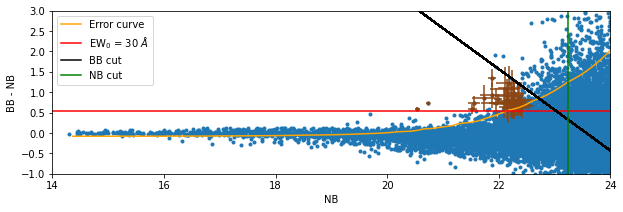

32


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


5000/5000
NB = 10


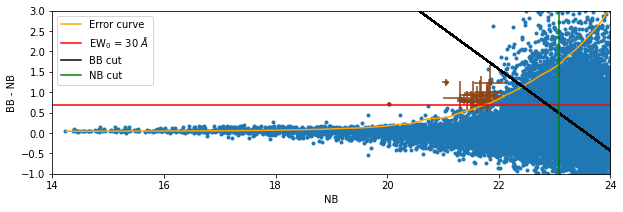

18


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


5000/5000
NB = 11


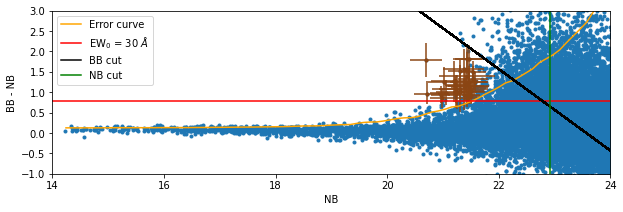

31


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


5000/5000
NB = 12


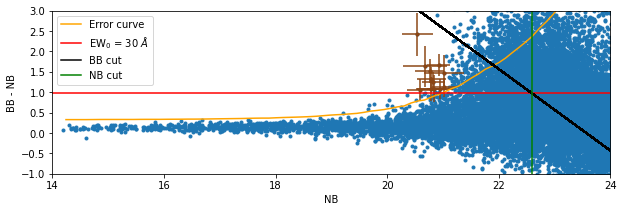

12


In [6]:
sel_arr = []
nb_ind_arr = [9, 10, 11, 12]
for nb_ind in nb_ind_arr:
    sel_arr.append(make_selection(nb_ind))

In [7]:
LF_x = []
LF_y = []
i = 0
for nb_ind in nb_ind_arr:
    bb_ind = -3 # g
    mask_fzero = (cat['MAG'][:, nb_ind] < 90) & (cat['MAG'][:, bb_ind] < 90)

    nb_m = cat['MAG'][mask_fzero, nb_ind]
    bb_m = cat['MAG'][mask_fzero, bb_ind]
    nb_e = cat['ERR'][mask_fzero, nb_ind]
    bb_e = cat['ERR'][mask_fzero, bb_ind]
    
    selection = sel_arr[i] ; i+=1
    w_pivot = central_wavelength(load_tcurves(load_filter_tags()))[nb_ind]
    f_line = mag_to_flux(nb_m[selection], w_pivot) - mag_to_flux(bb_m[selection], w_pivot)
    w_fwhm = nb_fwhm(load_tcurves(load_filter_tags()), nb_ind, True)
    n_bins = 5

    x, y = LumFunc(f_line, w_pivot, w_fwhm, n_bins)
    LF_x.append(x)
    LF_y.append(y)

TypeError: LumFunc() missing 2 required positional arguments: 'L_min' and 'L_max'

In [ ]:
for i in range(len(nb_ind_arr)):
    fig, ax = plt.subplots(figsize=(8,7))
    ax.plot(LF_x[i], LF_y[i], '.', markersize = 20)
    ax.set_yscale('log')
    ax.set_ylabel(r'$\Phi$ [Mpc$^{-3}\Delta\log L^{-1}$]', size=15)
    ax.set_xlabel(r'$\log_{10}(L_{\mathrm{Ly}\alpha}\,/\,\mathrm{erg}\,\mathrm{s}^{-1})$', size=15)
    
    print(load_tcurves(load_filter_tags())['tag'][nb_ind_arr[i]])
    plt.show()